<a href="https://colab.research.google.com/github/Existanze54/sirius-neural-networks-2024/blob/main/Practices/07S_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказание сайтов сплайсинга

Сплайсинг $-$ происходящее в ходе процессинга РНК вырезание определённых нуклеотидных последовательностей (интронов) из молекул РНК и соединения оставшихся последовательностей, сохраняющихся в «зрелой» молекуле (экзонов).
Участвующие в процессе сплайсинга белки распознают границы интронов благодаря наличию в последовательности донорных (5') и акцепторных (3') сайтов.

Датасет из <a href="https://www.kaggle.com/muhammetvarl/splicejunction-gene-sequences-dataset">Kaggle</a> содержит закодированные последовательности РНК, размеченные на 3 класса: содержит донорный сайт, содержит акцепторный сайт, и не содержит таких сайтов. Воспользуемся им для изучения возможностей RNN.


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/rnn/splicing.gif" alt="Drawing" width= "500px;"/>

Датасет представлен закодированными в бинарном формате последовательностями длиной 60, по три "признака" на нуклеотид (всего 180 фичей):

* A $\rightarrow$ 1 0 0
* C $\rightarrow$ 0 1 0
* G $\rightarrow$ 0 0 1
* U $\rightarrow$ 0 0 0

Так можно делать, но torch позволяет нам делать хитрее. Для каждого из трех "признаков" отведем свою размерность, таким образом сведя датасет $N * 180$ к $N * 60 * 3$.

Загрузим датасет:

In [1]:
import pandas as pd
import torch

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
!if [ ! -f ./rna.csv ]; then wget https://kodomo.fbb.msu.ru/FBB/year_20/ml/rnn/rna.csv; fi

--2024-05-16 10:51:06--  https://kodomo.fbb.msu.ru/FBB/year_20/ml/rnn/rna.csv
Resolving kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)... 93.180.63.127
Connecting to kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1154490 (1.1M) [text/csv]
Saving to: ‘rna.csv’

rna.csv             100%[===================>]   1.10M  1.09MB/s    in 1.0s    

2024-05-16 10:51:08 (1.09 MB/s) - ‘rna.csv’ saved [1154490/1154490]



In [24]:
df = pd.read_csv("rna.csv")

print(df.shape)
df.head()

(3186, 181)


,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A171,A172,A173,A174,A175,A176,A177,A178,A179,class
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,3
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,3
2,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,3
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,2


In [12]:
df["class"].value_counts()

class
3    1654
1     767
2     765
Name: count, dtype: int64

Приведем метки классов к нормальному виду:

In [25]:
y = df["class"]
X = df.drop(['class'], axis=1)

from sklearn.preprocessing import LabelEncoder
# Encode class values as integers and perform label-encoding
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y

array([2, 2, 2, ..., 1, 0, 0])

In [6]:
encoder.classes_

array([1, 2, 3])

## Задание 1

Поменяйте размерность датасета: от $N * 180$ к $N * 60 * 3$. Вам поможет <a href='https://pytorch.org/docs/stable/generated/torch.Tensor.reshape.html'>torch.Tensor.reshape<a/>.

In [ ]:
# Train-Test
from sklearn.model_selection import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# torch.tensor infers the dtype automatically, while torch.Tensor returns a torch.FloatTensor.
X_train = torch.Tensor(X_train.values)
X_train = X_train.reshape((#put your code here))
y_train = torch.Tensor(y_train)
y_train = y_train.type(torch.LongTensor)

X_test = torch.Tensor(X_test.values)

X_test = X_test.reshape((#put your code here))

y_test = torch.Tensor(y_test)
y_test = y_test.type(torch.LongTensor)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [20]:
from sklearn.model_selection import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [15]:
X_train.values

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

In [21]:
X_train = torch.Tensor(X_train.values)
X_train[0]

tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [23]:
X_train_rsh = X_train.reshape(-1, 60, 3)
X_train_rsh[0]

tensor([[0., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0

In [26]:
# Train-Test
from sklearn.model_selection import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# torch.tensor infers the dtype automatically, while torch.Tensor returns a torch.FloatTensor.
X_train = torch.Tensor(X_train.values)
X_train = X_train.reshape(-1, 60, 3)
y_train = torch.Tensor(y_train)
y_train = y_train.type(torch.LongTensor)

X_test = torch.Tensor(X_test.values)

X_test = X_test.reshape(-1, 60, 3)

y_test = torch.Tensor(y_test)
y_test = y_test.type(torch.LongTensor)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([2230, 60, 3]) torch.Size([956, 60, 3]) torch.Size([2230]) torch.Size([956])


## Задание 2

Реализуйте класс spliceJuncPredictor. Нейросеть должна содержать 1 рекуррентный слой и 1 полносвязный. Укажите batch_first=True.  

In [27]:
import torch
import torch.nn as nn

In [28]:
?nn.RNN

In [31]:
class spliceJuncPredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.rnn = nn.RNN(input_size=input_size,
                          hidden_size=hidden_size,
                          batch_first=True)
        self.fc = nn.Linear(hidden_size, 3)

    def forward(self, x):
        out, h = self.rnn(x)
        y = self.fc(h)
        return y[0] # убираем "лишнюю" размерность

Проверьте, что сеть правильно работает и возвращает тензор нужной размерности (*какой?*). Размерность скрытого слоя можете подобрать по желанию.

In [32]:
input_size = 3
hidden_size = 16
rnn = spliceJuncPredictor(input_size, hidden_size)

out = rnn(X_train)
print(out.shape)

torch.Size([2230, 3])


Воспользуйтесть кодом и обучите сеть. Оцените качество пресказания.

In [33]:
import torch.utils.data as data_utils

EPOCHS_NUM = 150
BATCH_SIZE = 400

train_loader = data_utils.DataLoader(data_utils.TensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
test_loader = data_utils.DataLoader(data_utils.TensorDataset(X_test, y_test), batch_size=BATCH_SIZE, shuffle=False)

In [34]:
def validate(model,testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in testloader:
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

def train(model, num_epochs, learning_rate = 0.01):

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
    model.train()
    for epoch in range(num_epochs):
        for feat_batch, labels_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(feat_batch)
            loss = criterion(outputs, labels_batch)
            loss.backward()
            optimizer.step()
        accuracy = validate(model,test_loader)
        if epoch % 25 == 0:
            print(f"Epoch {epoch} Loss {loss.item():.2f} Accuracy {accuracy:.2f}")

In [35]:
rnn = spliceJuncPredictor(input_size, hidden_size)
train(rnn, num_epochs=EPOCHS_NUM)

Epoch 0 Loss 1.04 Accuracy 0.50
Epoch 25 Loss 0.92 Accuracy 0.54
Epoch 50 Loss 0.99 Accuracy 0.50
Epoch 75 Loss 0.88 Accuracy 0.60
Epoch 100 Loss 0.94 Accuracy 0.52
Epoch 125 Loss 0.70 Accuracy 0.67


In [36]:
EPOCHS_NUM = 150
BATCH_SIZE = 400

input_size = 3
hidden_size = 32

rnn = spliceJuncPredictor(input_size, hidden_size)
train(rnn, num_epochs=EPOCHS_NUM)

Epoch 0 Loss 1.02 Accuracy 0.50
Epoch 25 Loss 0.94 Accuracy 0.52
Epoch 50 Loss 1.05 Accuracy 0.48
Epoch 75 Loss 1.02 Accuracy 0.50
Epoch 100 Loss 1.02 Accuracy 0.51
Epoch 125 Loss 0.91 Accuracy 0.52


In [37]:
EPOCHS_NUM = 150
BATCH_SIZE = 400

input_size = 3
hidden_size = 32

rnn = spliceJuncPredictor(input_size, hidden_size)
train(rnn, num_epochs=EPOCHS_NUM, learning_rate=3e-4)

Epoch 0 Loss 1.11 Accuracy 0.30
Epoch 25 Loss 1.01 Accuracy 0.50
Epoch 50 Loss 1.04 Accuracy 0.50
Epoch 75 Loss 0.96 Accuracy 0.51
Epoch 100 Loss 0.99 Accuracy 0.54
Epoch 125 Loss 0.90 Accuracy 0.51


In [38]:
EPOCHS_NUM = 1500
BATCH_SIZE = 400

input_size = 3
hidden_size = 32

rnn = spliceJuncPredictor(input_size, hidden_size)
train(rnn, num_epochs=EPOCHS_NUM, learning_rate=3e-4)

Epoch 0 Loss 1.10 Accuracy 0.24
Epoch 25 Loss 1.03 Accuracy 0.50
Epoch 50 Loss 0.98 Accuracy 0.50
Epoch 75 Loss 0.94 Accuracy 0.53
Epoch 100 Loss 0.91 Accuracy 0.54
Epoch 125 Loss 0.94 Accuracy 0.54
Epoch 150 Loss 0.88 Accuracy 0.54
Epoch 175 Loss 0.79 Accuracy 0.59
Epoch 200 Loss 0.75 Accuracy 0.60
Epoch 225 Loss 0.82 Accuracy 0.60
Epoch 250 Loss 0.79 Accuracy 0.60
Epoch 275 Loss 0.73 Accuracy 0.61
Epoch 300 Loss 0.76 Accuracy 0.60
Epoch 325 Loss 0.64 Accuracy 0.62
Epoch 350 Loss 0.77 Accuracy 0.61
Epoch 375 Loss 0.71 Accuracy 0.63
Epoch 400 Loss 0.80 Accuracy 0.64
Epoch 425 Loss 0.66 Accuracy 0.64
Epoch 450 Loss 0.70 Accuracy 0.63
Epoch 475 Loss 0.69 Accuracy 0.65
Epoch 500 Loss 0.60 Accuracy 0.64
Epoch 525 Loss 0.57 Accuracy 0.64
Epoch 550 Loss 0.70 Accuracy 0.65
Epoch 575 Loss 0.66 Accuracy 0.64
Epoch 600 Loss 0.74 Accuracy 0.65
Epoch 625 Loss 0.64 Accuracy 0.65
Epoch 650 Loss 0.65 Accuracy 0.66
Epoch 675 Loss 0.68 Accuracy 0.66
Epoch 700 Loss 0.66 Accuracy 0.68
Epoch 725 Loss 0.62

In [39]:
EPOCHS_NUM = 1500
BATCH_SIZE = 400

input_size = 3
hidden_size = 128

rnn = spliceJuncPredictor(input_size, hidden_size)
train(rnn, num_epochs=EPOCHS_NUM, learning_rate=3e-4)

Epoch 0 Loss 1.06 Accuracy 0.50
Epoch 25 Loss 1.00 Accuracy 0.53
Epoch 50 Loss 0.82 Accuracy 0.56
Epoch 75 Loss 0.83 Accuracy 0.60
Epoch 100 Loss 0.70 Accuracy 0.63
Epoch 125 Loss 0.68 Accuracy 0.64
Epoch 150 Loss 0.74 Accuracy 0.66
Epoch 175 Loss 0.64 Accuracy 0.67
Epoch 200 Loss 0.58 Accuracy 0.70
Epoch 225 Loss 0.63 Accuracy 0.73
Epoch 250 Loss 0.65 Accuracy 0.71
Epoch 275 Loss 0.55 Accuracy 0.72
Epoch 300 Loss 0.66 Accuracy 0.77
Epoch 325 Loss 0.41 Accuracy 0.78
Epoch 350 Loss 0.42 Accuracy 0.83
Epoch 375 Loss 0.41 Accuracy 0.83
Epoch 400 Loss 0.41 Accuracy 0.83
Epoch 425 Loss 0.48 Accuracy 0.75
Epoch 450 Loss 0.32 Accuracy 0.87
Epoch 475 Loss 0.23 Accuracy 0.87
Epoch 500 Loss 0.37 Accuracy 0.88
Epoch 525 Loss 0.23 Accuracy 0.89
Epoch 550 Loss 0.22 Accuracy 0.86
Epoch 575 Loss 0.25 Accuracy 0.90
Epoch 600 Loss 0.21 Accuracy 0.89
Epoch 625 Loss 0.21 Accuracy 0.90
Epoch 650 Loss 0.21 Accuracy 0.90
Epoch 675 Loss 0.17 Accuracy 0.91
Epoch 700 Loss 0.18 Accuracy 0.90
Epoch 725 Loss 0.14

In [43]:
from sklearn.metrics import classification_report

def get_report(model, X_test, y_test):
    model.eval()
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    model_report = classification_report(y_test, predicted)
    print(model_report)

In [44]:
get_report(rnn, X_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       248
           1       0.94      0.95      0.94       229
           2       0.98      0.97      0.97       479

    accuracy                           0.96       956
   macro avg       0.96      0.96      0.96       956
weighted avg       0.96      0.96      0.96       956



## Задание 3

Замените RNN слой на <a href="https://pytorch.org/docs/stable/generated/torch.nn.GRU.html">GRU</a> или <a href="https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html">LSTM</a> (на выбор). Внесите необходимые изменения. Обучите сеть, оцените качество предсказания.

In [ ]:
?nn.LSTM

In [40]:
class spliceJuncPredictorLSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size,
                          hidden_size=hidden_size,
                          batch_first=True)
        self.fc = nn.Linear(hidden_size, 3)

    def forward(self, x):
        out, (h, c) = self.lstm(x)
        y = self.fc(h)
        return y[0] # убираем "лишнюю" размерность

In [ ]:
EPOCHS_NUM = 1500
BATCH_SIZE = 400

input_size = 3
hidden_size = 32

lstm = spliceJuncPredictorLSTM(input_size, hidden_size)
train(lstm, num_epochs=EPOCHS_NUM, learning_rate=3e-4)

In [ ]:
#put your code here

# Генерация изображений

Попробуем сгенерировать новые изображения, обучив простую генеративно-состязательную сеть на датасете [FashionMNIST](https://www.kaggle.com/zalando-research/fashionmnist) -- датасете изображений предметов одежды размером 28*28.

In [45]:
%matplotlib inline
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

from torch.utils.data import DataLoader
from PIL import Image
from torch import autograd
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [46]:
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import FashionMNIST

#Load the data

mnist = FashionMNIST(root='data',
              train=True,
              download=True,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))

100%|██████████| 26421880/26421880 [00:09<00:00, 2898219.31it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212425.67it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3877106.65it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7031024.75it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Label:  9


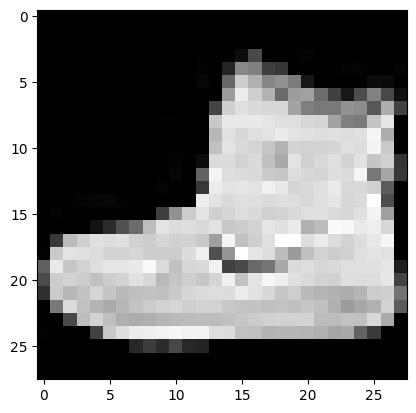

In [47]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

img, label = mnist[0]
print('Label: ', label)
img_norm = denorm(img)
plt.imshow(img_norm[0], cmap='gray')

In [48]:
data_loader = torch.utils.data.DataLoader(mnist, batch_size=64, shuffle=True)

## Задание 4.

Напишите полносвязный cGAN. В данном случае условие это lablel (номер класса) предмета одежды.

1. Сделайте эмбеддинг для лэйблов внутри модели
2. С помощью torch.cat добавьте этот эмбеддинг ко входу генератора и дискриминатора. Входное латентное пространство зададим, например, размера 100.

Ниже приведены рекомендованные для этого задания архитектуры сетей. Используйте их, вносите изменения по желанию.

3. Используйте следующую для генератора:
        self.model = nn.Sequential(
            nn.Linear(?, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
        
4. Используйте такую архитектуру для дискриминатора:
        self.model = nn.Sequential(
            nn.Linear(?, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

In [51]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.label_emb = nn.Embedding(10, 10)

        self.model = nn.Sequential(
            nn.Linear(28*28+10, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        x = x.view(x.size(0), 28*28)
        c = self.label_emb(labels)
        ## Change ?? in the next line
        x = torch.cat([x, c], 1)
        ##
        out = self.model(x)
        return out.squeeze()

In [52]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.label_emb = nn.Embedding(10, 10)

        self.model = nn.Sequential(
            nn.Linear(100 + 10, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, z, labels):
        z = z.view(z.size(0), 100)
        c = self.label_emb(labels)
        ## Change ?? in the next line
        x = torch.cat([z, c], 1)
        ##
        out = self.model(x)
        return out.view(x.size(0), 28, 28)

Обучим модель.

In [53]:
generator = Generator().cuda()
discriminator = Discriminator().cuda()

In [54]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=1e-4)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=1e-4)

In [55]:
def discriminator_train_step(batch_size, discriminator, generator, d_optimizer, criterion, real_images, labels):
    d_optimizer.zero_grad()

    # train with real images
    real_validity = discriminator(real_images, labels)
    real_loss = criterion(real_validity, torch.ones(batch_size).cuda())

    # train with fake images
    z = torch.randn(batch_size, 100).cuda()
    fake_labels = torch.LongTensor(np.random.randint(0, 10, batch_size)).cuda()
    fake_images = generator(z, fake_labels)
    fake_validity = discriminator(fake_images, fake_labels)
    fake_loss = criterion(fake_validity, torch.zeros(batch_size).cuda())

    d_loss = real_loss + fake_loss
    d_loss.backward()
    d_optimizer.step()
    return d_loss.data

In [56]:
def generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion):
    g_optimizer.zero_grad()
    z = torch.randn(batch_size, 100).cuda()
    fake_labels = torch.LongTensor(np.random.randint(0, 10, batch_size)).cuda()
    fake_images = generator(z, fake_labels)
    validity = discriminator(fake_images, fake_labels)
    g_loss = criterion(validity, torch.ones(batch_size).cuda())
    g_loss.backward()
    g_optimizer.step()
    return g_loss.data

Starting epoch 0...
g_loss: 3.3922, d_loss: 0.3699


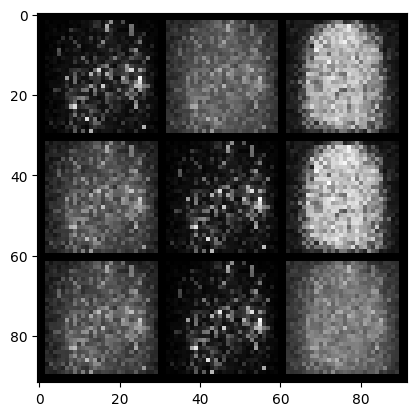

Starting epoch 1...
g_loss: 3.0043, d_loss: 0.6712


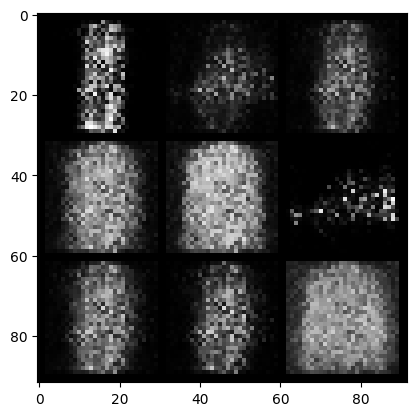

Starting epoch 2...
g_loss: 3.6369, d_loss: 0.4040


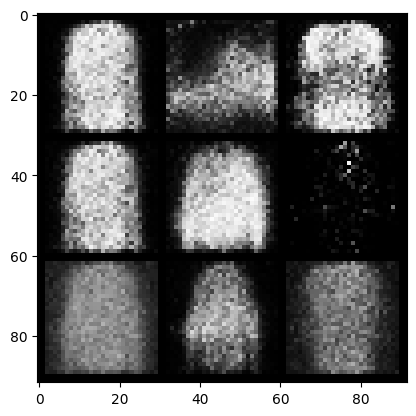

Starting epoch 3...
g_loss: 2.9675, d_loss: 0.3427


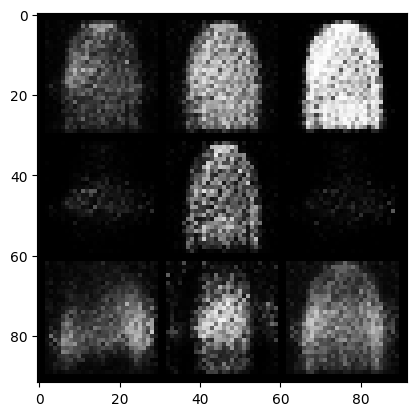

Starting epoch 4...
g_loss: 2.3745, d_loss: 0.4797


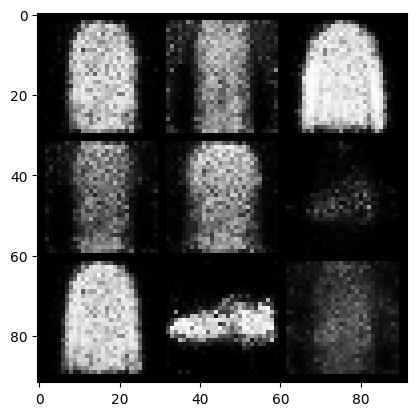

Starting epoch 5...
g_loss: 1.7515, d_loss: 0.5096


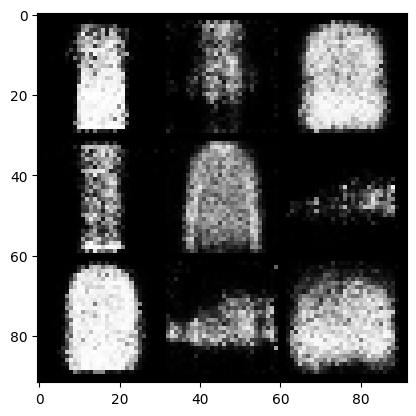

Starting epoch 6...
g_loss: 1.8195, d_loss: 0.5346


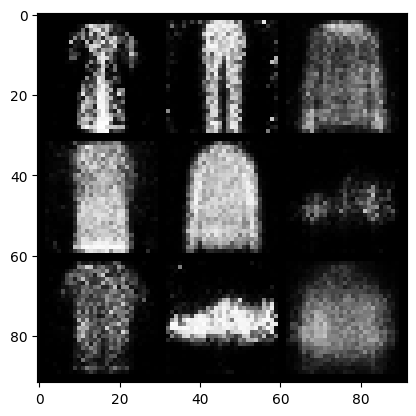

Starting epoch 7...
g_loss: 2.1674, d_loss: 0.8264


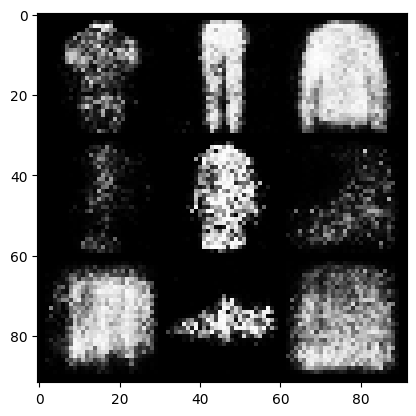

Starting epoch 8...
g_loss: 1.7054, d_loss: 0.6668


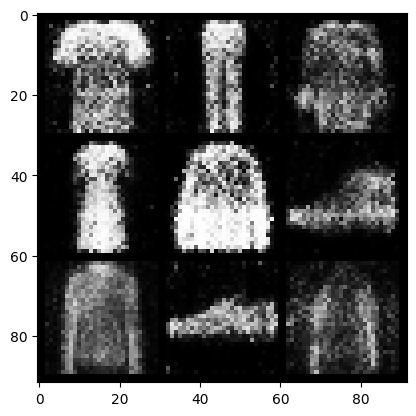

Starting epoch 9...
g_loss: 1.9079, d_loss: 0.8092


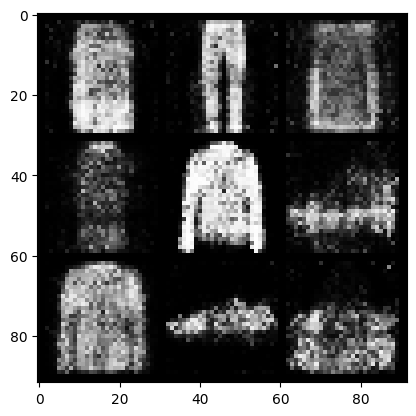

Starting epoch 10...
g_loss: 1.7877, d_loss: 0.7893


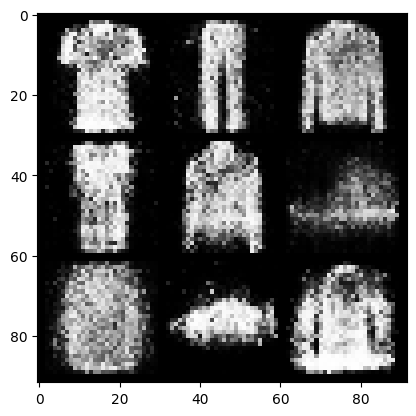

Starting epoch 11...
g_loss: 2.0159, d_loss: 0.4734


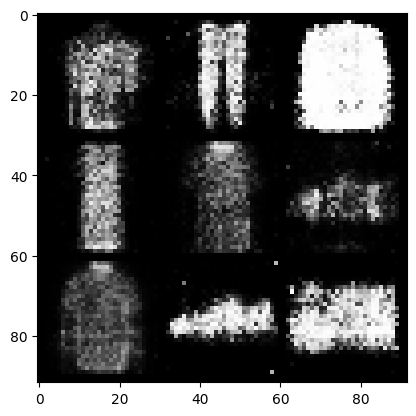

Starting epoch 12...
g_loss: 1.5180, d_loss: 0.9081


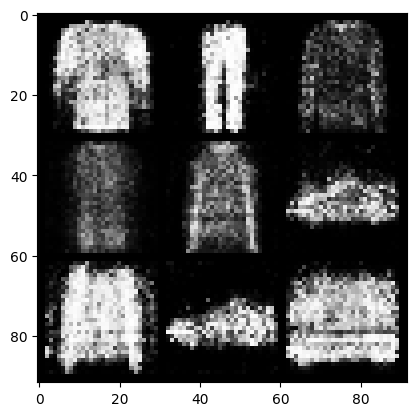

Starting epoch 13...
g_loss: 1.3490, d_loss: 1.0035


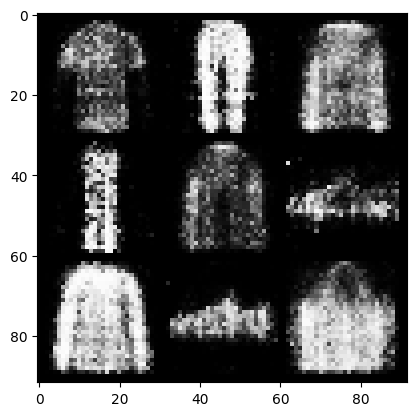

Starting epoch 14...
g_loss: 1.2268, d_loss: 0.9252


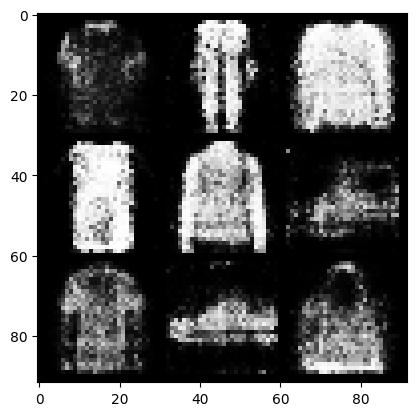

Starting epoch 15...
g_loss: 1.3702, d_loss: 1.0721


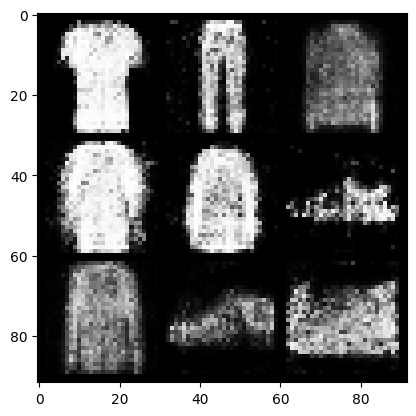

Starting epoch 16...
g_loss: 1.3328, d_loss: 0.9163


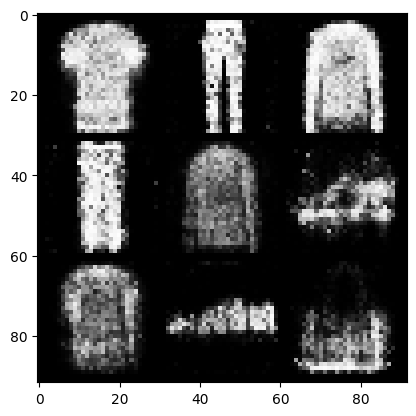

Starting epoch 17...
g_loss: 1.6208, d_loss: 0.8375


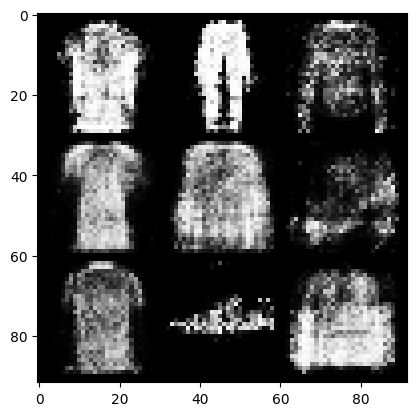

Starting epoch 18...
g_loss: 1.1841, d_loss: 1.0133


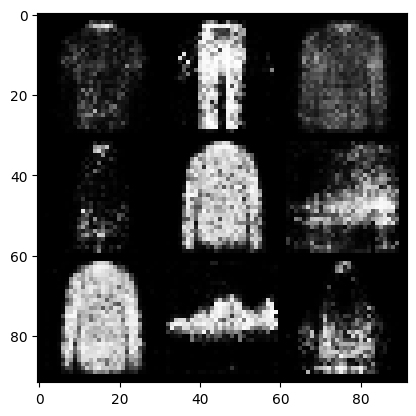

Starting epoch 19...
g_loss: 1.4252, d_loss: 0.8827


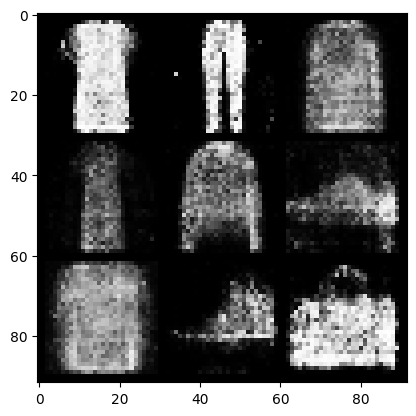

Starting epoch 20...
g_loss: 1.5974, d_loss: 0.9073


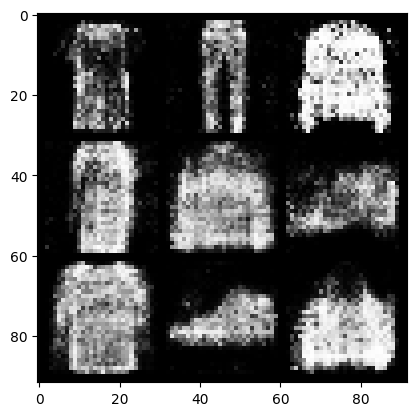

Starting epoch 21...
g_loss: 1.3361, d_loss: 0.9285


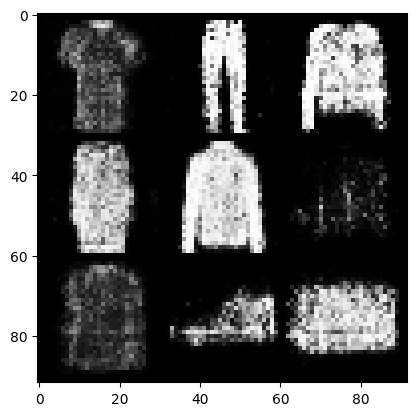

Starting epoch 22...
g_loss: 1.2357, d_loss: 0.9546


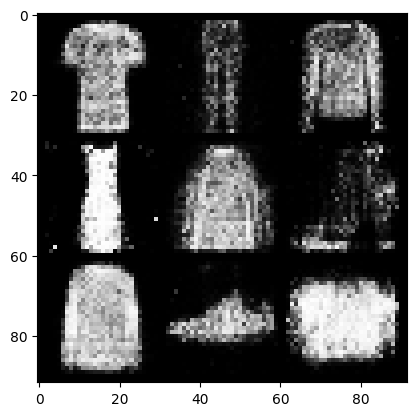

Starting epoch 23...
g_loss: 1.2304, d_loss: 1.3052


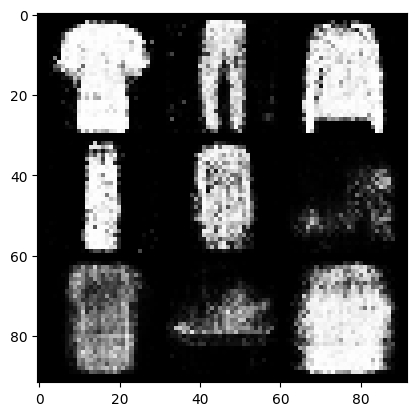

Starting epoch 24...
g_loss: 0.9440, d_loss: 1.3484


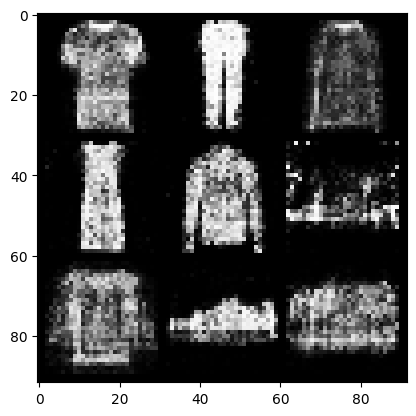

Starting epoch 25...
g_loss: 1.3865, d_loss: 1.0121


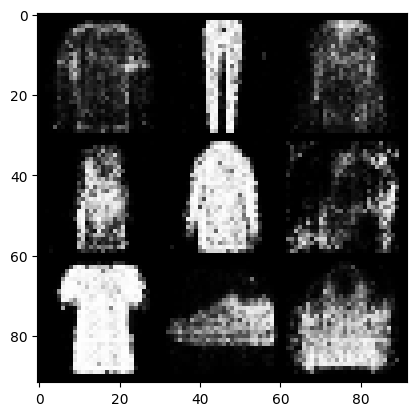

Starting epoch 26...
g_loss: 1.3087, d_loss: 1.0880


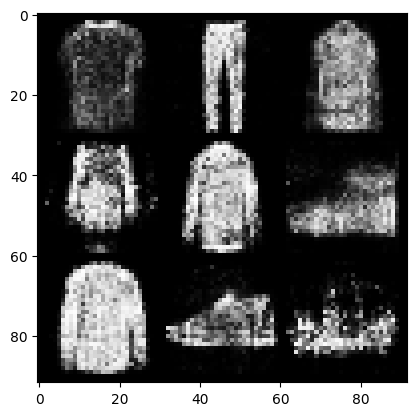

Starting epoch 27...
g_loss: 1.0690, d_loss: 1.2652


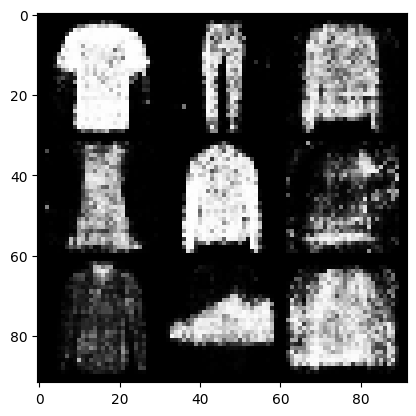

Starting epoch 28...
g_loss: 1.1196, d_loss: 1.2873


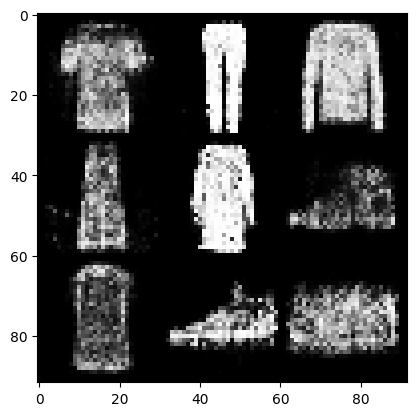

Starting epoch 29...
g_loss: 1.1286, d_loss: 1.2076


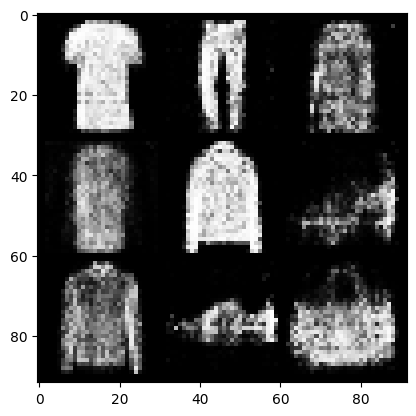

In [57]:
num_epochs = 30
n_critic = 5
display_step = 300
for epoch in range(num_epochs):
    print(f'Starting epoch {epoch}...')
    for i, (images, labels) in enumerate(data_loader):
        real_images = images.cuda()
        labels = labels.cuda()
        generator.train()
        batch_size = real_images.size(0)
        d_loss = discriminator_train_step(len(real_images), discriminator,
                                          generator, d_optimizer, criterion,
                                          real_images, labels)


        g_loss = generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion)

    generator.eval()
    print(f'g_loss: {g_loss:.4f}, d_loss: {d_loss:.4f}')
    z = torch.randn(9, 100).cuda()
    labels = torch.LongTensor(np.arange(9)).cuda()
    sample_images = generator(z, labels).unsqueeze(1).data.cpu()
    grid = make_grid(sample_images, nrow=3, normalize=True).permute(1,2,0).numpy()
    plt.imshow(grid)
    plt.show()

Попробуем сгенерировать по несколько предметов каждого класса.

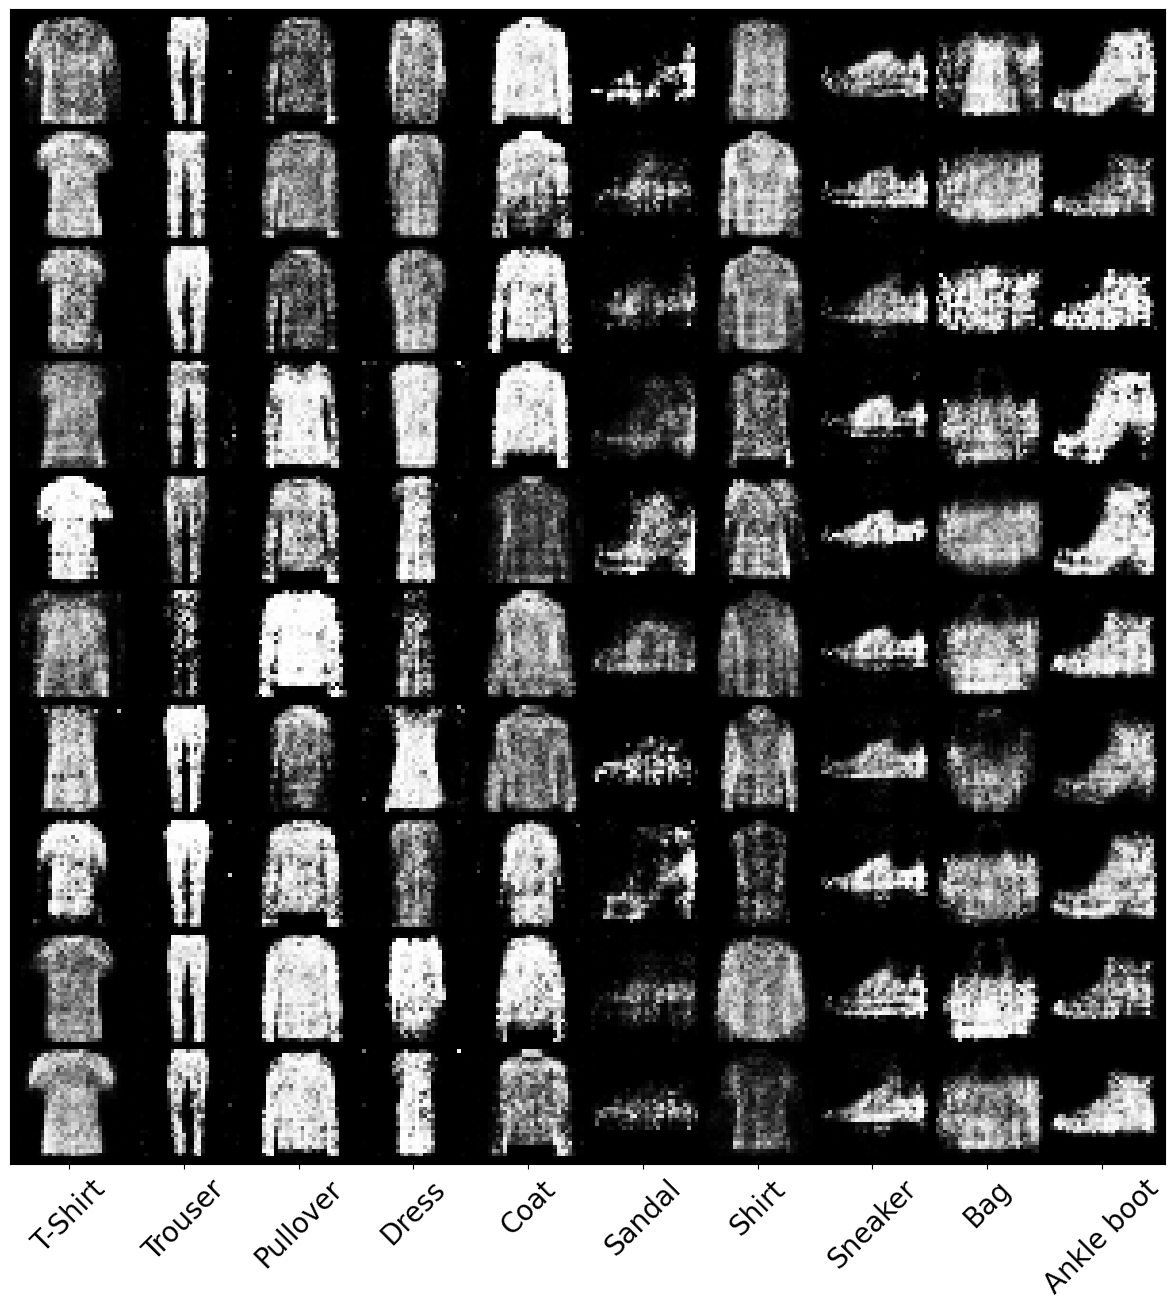

In [58]:
z = torch.randn(100, 100).cuda()
labels = torch.LongTensor([i for _ in range(10) for i in range(10)]).cuda()
sample_images = generator(z, labels).unsqueeze(1).data.cpu()
grid = make_grid(sample_images, nrow=10, normalize=True).permute(1,2,0).numpy()
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(grid)
_ = plt.yticks([])
_ = plt.xticks(np.arange(15, 300, 30), ['T-Shirt', 'Trouser', 'Pullover', 'Dress',\
                                        'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',\
                                        'Ankle boot'], rotation=45, fontsize=20)